In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#reading data from csv file
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning

## Handling Missing Values
1. Handling Missing Values
2. Handlin Duplicates
3. Check data type
4. Understand the dataset

In [ ]:
#checking missing values
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [ ]:
#check gender categories
df["Gender"].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [ ]:
#checking type of contact categories
df["TypeofContact"].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [ ]:
#checking marital status
df["MaritalStatus"].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [ ]:
#correcting Gender and Marital Status
df["Gender"] = df["Gender"].str.replace("Fe Male", "Female")
df["MaritalStatus"] = df["MaritalStatus"].str.replace("Single", "Unmarried")

In [ ]:
#Check Missing Values
## these are features with missing values
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), "% missing values")

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [ ]:
#statistics on numerical columns
df[features_with_na].select_dtypes(exclude = "object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values
1. Impute Median Value for Age column.
2. Impute Mode for Type of Contract.
3. Impute Median for Duration of Pitch.
4. Import Mode for Number of Followup as it is a discrete feature.
5. Impute Mode for Preferred Property Star.
6. Impute mEdian for Number of Trips.
7. Impute Mode for Number Of Children Visiting.
8. Impute Median for Monthly Income.

In [ ]:
#Age
df.Age.fillna(df.Age.median(), inplace = True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace = True)

#DurationofPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace = True)

#NumberofFollowup
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace = True)

#PreferredPropertyStart
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace = True)

#NumberofTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace = True)

#NumberofChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace = True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace = True)

In [ ]:
#checking null values again
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [ ]:
#dropping irrelevant feature CustomerID
df.drop("CustomerID", inplace = True, axis = 1)

# Feature Engineering

## Feature Extraction

In [ ]:
#create new column for feature
df["TotalVisiting"] = df.NumberOfChildrenVisiting + df.NumberOfPersonVisiting
#dropping features NumberOfChildrenVisiting and NumberOfPersonVisiting
df.drop(columns = ["NumberOfChildrenVisiting", "NumberOfPersonVisiting"], axis = 1, inplace = True)

In [ ]:
#get all numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != "object"]
print("Number of Numerical Features:", len(num_features))

Number of Numerical Features: 12


In [ ]:
#get all categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == "object"]
print("Number of Categorical Features:", len(cat_features))

Number of Categorical Features: 6


In [ ]:
#Discrete Features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print("Number of discrete features:", len(discrete_features))

Number of discrete features: 9


In [ ]:
#Continuous Features
continuous_features = [feature for feature in num_features if len(df[feature].unique()) > 25]
print("Number of Continuous features:", len(continuous_features))

Number of Continuous features: 3


# Train Test Split and Model Train

In [ ]:
#separting input and output features
X = df.drop("ProdTaken", axis = 1)
y = df["ProdTaken"]

In [ ]:
#printing shape
X.shape, y.shape

((4888, 17), (4888,))

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [ ]:
#categorical features in data
cat_features = X.select_dtypes(include = "object").columns
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [ ]:
#numerical features in data
num_features = X.select_dtypes(exclude = "object").columns

In [ ]:
#create column transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = "first")
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [ ]:
#transforming train data
X_train = preprocessor.fit_transform(X_train)

In [ ]:
#printing training data
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [ ]:
#transforming test data
X_test = preprocessor.transform(X_test)

# Random Forest Classifier

In [ ]:
#implementing random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, ConfusionMatrixDisplay


In [ ]:
models = {"Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier()}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average = "weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    #Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = "weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training set")
    print(f"- Accuracy: {model_train_accuracy: .4f}")
    print(f"- F1 Score: {model_train_f1: .4f}")
    print(f"- Precision: {model_train_precision: .4f}")
    print(f"- Recall: {model_train_recall: .4f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score: .4f}")

    print("-------------------------------------------------")
    print("Model Performance Test set")
    print(f"- Accuracy: {model_test_accuracy: .4f}")
    print(f"- F1 Score: {model_test_f1: .4f}")
    print(f"- Precision: {model_test_precision: .4f}")
    print(f"- Recall: {model_test_recall: .4f}")
    print(f"- Roc Auc Score: {model_test_rocauc_score: .4f}")
    print("==================================================")
    print()
    print()



Random Forest
Model Performance for Training set
- Accuracy:  1.0000
- F1 Score:  1.0000
- Precision:  1.0000
- Recall:  1.0000
- Roc Auc Score:  1.0000
-------------------------------------------------
Model Performance Test set
- Accuracy:  0.9274
- F1 Score:  0.9216
- Precision:  0.9688
- Recall:  0.6492
- Roc Auc Score:  0.8221


Decision Tree
Model Performance for Training set
- Accuracy:  1.0000
- F1 Score:  1.0000
- Precision:  1.0000
- Recall:  1.0000
- Roc Auc Score:  1.0000
-------------------------------------------------
Model Performance Test set
- Accuracy:  0.9162
- F1 Score:  0.9155
- Precision:  0.7978
- Recall:  0.7644
- Roc Auc Score:  0.8587




In [ ]:
# Hyperparameter Tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features":[5, 7, "auto", 8],
             "min_samples_split":[2, 8, 15, 20],
             "n_estimators":[100,200,500,1000]}

#Models List for Hyperparameter Tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params, n_iter = 100, cv = 3, verbose = 2, n_jobs = -1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
for model_name in model_param:
    print(f"--------------Best Params for {model_name}--------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------Best Params for RF--------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [ ]:
models = {"Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth = None)}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average = "weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    #Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = "weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training set")
    print(f"- Accuracy: {model_train_accuracy: .4f}")
    print(f"- F1 Score: {model_train_f1: .4f}")
    print(f"- Precision: {model_train_precision: .4f}")
    print(f"- Recall: {model_train_recall: .4f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score: .4f}")

    print("-------------------------------------------------")
    print("Model Performance Test set")
    print(f"- Accuracy: {model_test_accuracy: .4f}")
    print(f"- F1 Score: {model_test_f1: .4f}")
    print(f"- Precision: {model_test_precision: .4f}")
    print(f"- Recall: {model_test_recall: .4f}")
    print(f"- Roc Auc Score: {model_test_rocauc_score: .4f}")
    print("==================================================")
    print()
    print()



Random Forest
Model Performance for Training set
- Accuracy:  1.0000
- F1 Score:  1.0000
- Precision:  1.0000
- Recall:  1.0000
- Roc Auc Score:  1.0000
-------------------------------------------------
Model Performance Test set
- Accuracy:  0.9387
- F1 Score:  0.9350
- Precision:  0.9645
- Recall:  0.7120
- Roc Auc Score:  0.8528




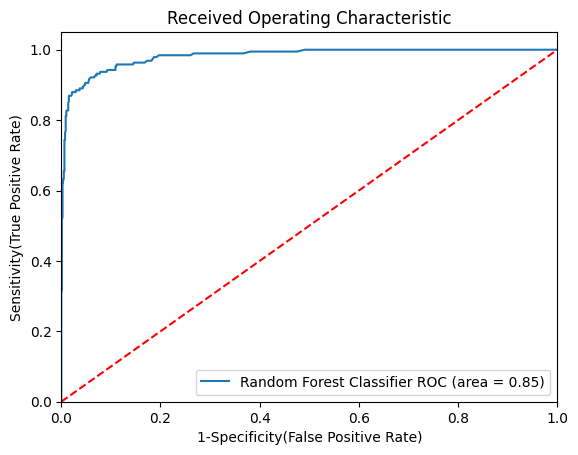

In [ ]:
#plotting ROC AUC curver
from sklearn.metrics import roc_auc_score, roc_curve

#Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        "label": "Random Forest Classifier",
        "model": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth = None),
        "auc":0.8528
    }
]
for algo in auc_models:
    model = algo["model"]
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label = "%s ROC (area = %0.2f)" % (algo["label"], algo["auc"]))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim(0.0, 1.05)
plt.xlabel("1-Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.title("Received Operating Characteristic")
plt.legend(loc = "lower right")
plt.savefig("auc.png")
plt.show()

# Random Forest Regression Project

In [ ]:
#importing data
cars = pd.read_csv("cardekho_dataset.csv")
cars = cars.iloc[:, 1:]
cars.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# Data Cleaning

## Handling Missing Values

In [ ]:
#checking null values
df.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfFollowups,0
ProductPitched,0
PreferredPropertyStar,0


In [ ]:
#removing unnecessary columns
cars.drop(columns = ["car_name", "brand"], axis = 1, inplace = True)
cars.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
#checking unique values in model
cars["model"].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [ ]:
#Getting all different types of features
num_features = [feature for feature in cars.columns if cars[feature].dtype != "object"]
print("Number of Numerical Features:", len(num_features))
cat_features = [feature for feature in cars.columns if cars[feature].dtype == "object"]
print("Number of Numerical Features:", len(cat_features))
discrete_features = [feature for feature in num_features if len(cars[feature].unique()) <= 25]
print("Number of Discrete Features:", len(discrete_features))
continuous_features = [feature for feature in num_features if len(cars[feature].unique()) > 25]
print("Number of Discrete Features:", len(continuous_features))

Number of Numerical Features: 7
Number of Numerical Features: 4
Number of Discrete Features: 2
Number of Discrete Features: 5


In [ ]:
#independent and dependent feature
X = cars.drop("selling_price", axis = 1)
y = cars["selling_price"]

# Feature Encoding and Scaling

In [ ]:
#label encoding model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["model"] = le.fit_transform(X["model"])

In [ ]:
#Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude = "object").columns
onehot_columns = ["seller_type", "fuel_type", "transmission_type"]
label_encoder_columns = ["model"]
numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop = "first")
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ], remainder = "passthrough" # keep all other features as they are
)

X = preprocessor.fit_transform(X)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((12328, 14), (3083, 14))

# Model Training and Model Selection

In [ ]:
#importing all models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#create a function to evaluate a model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [ ]:
# Beginning Model Training
models = {
    "Linear Regression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Performance on train and test data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training Set")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    print("------------------------------------------")
    print("Model Performance for Test Set")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    print("==========================================")
    print()
    print()




Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 553855.6665
- Mean Absolute Error: 268101.6071
- R2 Score: 0.6218
------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 502543.5930
- Mean Absolute Error: 279618.5794
- R2 Score: 0.6645


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 553855.6710
- Mean Absolute Error: 268099.2226
- R2 Score: 0.6218
------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 502542.6696
- Mean Absolute Error: 279614.7461
- R2 Score: 0.6645


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 553856.3160
- Mean Absolute Error: 268059.8015
- R2 Score: 0.6218
------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 502533.8230
- Mean Absolute Error: 279557.2169
- R2 Score: 0.6645


KNN Regressor
Model Performance for Training Set
- Root Mean Squared Error: 325

In [ ]:
#Hyperparameter Tuning for KNN and Random Forest
knn_params = {"n_neighbors":[2,3,10,20,40,50]}
rf_params = {"max_depth":[5,8,15,None,10],
             "max_features":[5,7,"auto", 8],
             "min_samples_split":[2,8,15,20],
             "n_estimators":[100,200,500,1000]}

#Model List for Hyperparameter tuning
randomcv_models = [("KNN", KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)]

In [ ]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model, param_distributions=params, n_iter = 100,
                                cv = 3, verbose = 2, n_jobs = -1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
for model_name in model_param:
    print(f"-------------Best Params for {model_name}-------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------Best Params for KNN-------------------
{'n_neighbors': 10}
-------------Best Params for RF-------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [ ]:
#Retraining the models with best params
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators = 500, min_samples_split=2, max_features=7, max_depth = None),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=10)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Performance on train and test data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Training Set")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    print("------------------------------------------")
    print("Model Performance for Test Set")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    print("==========================================")
    print()
    print()

Random Forest Regressor
Model Performance for Training Set
- Root Mean Squared Error: 126164.9671
- Mean Absolute Error: 38984.4821
- R2 Score: 0.9804
------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 213763.8390
- Mean Absolute Error: 98503.3120
- R2 Score: 0.9393


KNN Regressor
Model Performance for Training Set
- Root Mean Squared Error: 363465.6927
- Mean Absolute Error: 103489.6090
- R2 Score: 0.8371
------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 263849.8119
- Mean Absolute Error: 117481.4548
- R2 Score: 0.9075


